In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.datasets import mnist
import time
import urllib
import os.path
import sys
import os
from os import listdir
from tensorflow.keras.utils import img_to_array, load_img
from numpy import asarray
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report
from keras.callbacks import EarlyStopping

In [2]:
#Model including Glioma
datagen = ImageDataGenerator(rescale=1.0/255.0)
train_it2 = datagen.flow_from_directory(os.path.join(os.getcwd(), 'archive_g', 'Training'),
 class_mode='categorical', batch_size=10, target_size=(150, 150), color_mode="grayscale")
test_it2 = datagen.flow_from_directory(os.path.join(os.getcwd(), 'archive_g', 'Testing'),
 class_mode='categorical', batch_size=10, target_size=(150, 150), color_mode="grayscale", shuffle = False)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [3]:
model2 = keras.Sequential()
model2.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150, 150, 1)))
model2.add(MaxPooling2D(2, 2))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(Dropout(0.3))
model2.add(MaxPooling2D(2, 2))
model2.add(BatchNormalization())
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(4, activation='softmax'))

model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [4]:
history = model2.fit_generator(train_it2, steps_per_epoch=len(train_it2), validation_data=test_it2, validation_steps=len(test_it2), epochs=10, verbose=1)
model2.summary()
score = model2.evaluate_generator(test_it2, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/10


/var/folders/rc/gp38btvd4t10gf8g1hgvk0s40000gn/T/ipykernel_87251/848427051.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model2.fit_generator(train_it2, steps_per_epoch=len(train_it2), validation_data=test_it2, validation_steps=len(test_it2), epochs=10, verbose=1)
2023-05-05 17:45:42.204737: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


287/287 [==============================] - 29s 100ms/step - loss: 0.9063 - accuracy: 0.7209 - val_loss: 1.4438 - val_accuracy: 0.5254
Epoch 2/10
287/287 [==============================] - 30s 104ms/step - loss: 0.3090 - accuracy: 0.8774 - val_loss: 1.8191 - val_accuracy: 0.6091
Epoch 3/10
287/287 [==============================] - 30s 105ms/step - loss: 0.1401 - accuracy: 0.9460 - val_loss: 2.8397 - val_accuracy: 0.6827
Epoch 4/10
287/287 [==============================] - 30s 106ms/step - loss: 0.0977 - accuracy: 0.9697 - val_loss: 3.0328 - val_accuracy: 0.7335
Epoch 5/10
287/287 [==============================] - 30s 106ms/step - loss: 0.0780 - accuracy: 0.9721 - val_loss: 2.4886 - val_accuracy: 0.7081
Epoch 6/10
287/287 [==============================] - 30s 106ms/step - loss: 0.0758 - accuracy: 0.9742 - val_loss: 3.0983 - val_accuracy: 0.7487
Epoch 7/10
287/287 [==============================] - 30s 106ms/step - loss: 0.0742 - accuracy: 0.9756 - val_loss: 3.5289 - val_accuracy: 0.7

/var/folders/rc/gp38btvd4t10gf8g1hgvk0s40000gn/T/ipykernel_87251/848427051.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model2.evaluate_generator(test_it2, verbose=1)


40/40 [==============================] - 1s 32ms/step - loss: 3.2555 - accuracy: 0.7234
Test loss: 3.2554566860198975
Test accuracy: 0.7233502268791199


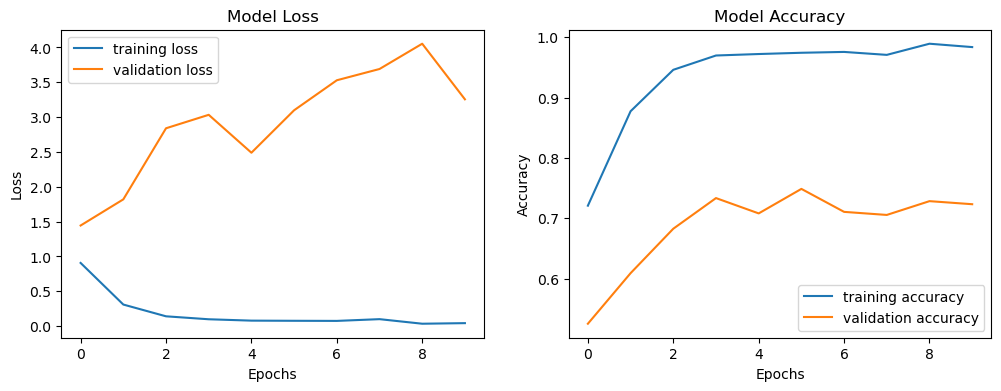

In [5]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

/var/folders/rc/gp38btvd4t10gf8g1hgvk0s40000gn/T/ipykernel_87251/2432950969.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model2.predict_generator(test_it2, 394)


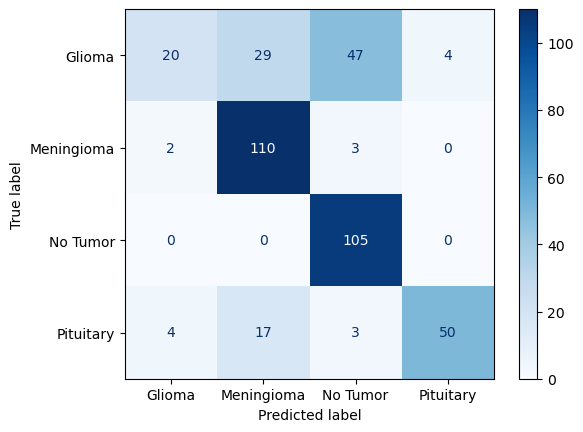

In [6]:
Y_pred = model2.predict_generator(test_it2, 394)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(test_it2.classes, y_pred)
target_names = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [7]:
#
datagen = ImageDataGenerator(rescale=1.0/255.0)
train_it = datagen.flow_from_directory(os.path.join(os.getcwd(), 'archive', 'Training'),
 class_mode='categorical', batch_size=10, target_size=(150, 150), color_mode="grayscale")
test_it = datagen.flow_from_directory(os.path.join(os.getcwd(), 'archive', 'Testing'),
 class_mode='categorical', batch_size=10, target_size=(150, 150), color_mode="grayscale", shuffle = False)

Found 2044 images belonging to 3 classes.
Found 294 images belonging to 3 classes.


In [8]:
model = keras.Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150, 150, 1)))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [9]:
history = model.fit_generator(train_it, steps_per_epoch=len(train_it), validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=1)
model.summary()
score = model.evaluate_generator(test_it, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/20


/var/folders/rc/gp38btvd4t10gf8g1hgvk0s40000gn/T/ipykernel_87251/2524613079.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_it, steps_per_epoch=len(train_it), validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=1)


205/205 [==============================] - 22s 107ms/step - loss: 0.6849 - accuracy: 0.7935 - val_loss: 0.8790 - val_accuracy: 0.5680
Epoch 2/20
205/205 [==============================] - 22s 107ms/step - loss: 0.1944 - accuracy: 0.9281 - val_loss: 0.4622 - val_accuracy: 0.7993
Epoch 3/20
205/205 [==============================] - 22s 105ms/step - loss: 0.0771 - accuracy: 0.9716 - val_loss: 0.3302 - val_accuracy: 0.9286
Epoch 4/20
205/205 [==============================] - 22s 106ms/step - loss: 0.0724 - accuracy: 0.9750 - val_loss: 0.4394 - val_accuracy: 0.8912
Epoch 5/20
205/205 [==============================] - 22s 105ms/step - loss: 0.0462 - accuracy: 0.9868 - val_loss: 0.2767 - val_accuracy: 0.9490
Epoch 6/20
205/205 [==============================] - 22s 106ms/step - loss: 0.0675 - accuracy: 0.9819 - val_loss: 0.5582 - val_accuracy: 0.8673
Epoch 7/20
205/205 [==============================] - 22s 106ms/step - loss: 0.0491 - accuracy: 0.9839 - val_loss: 0.3970 - val_accuracy: 0.9

/var/folders/rc/gp38btvd4t10gf8g1hgvk0s40000gn/T/ipykernel_87251/2524613079.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_it, verbose=1)


30/30 [==============================] - 2s 50ms/step - loss: 0.1511 - accuracy: 0.9762
Test loss: 0.15112484991550446
Test accuracy: 0.976190447807312


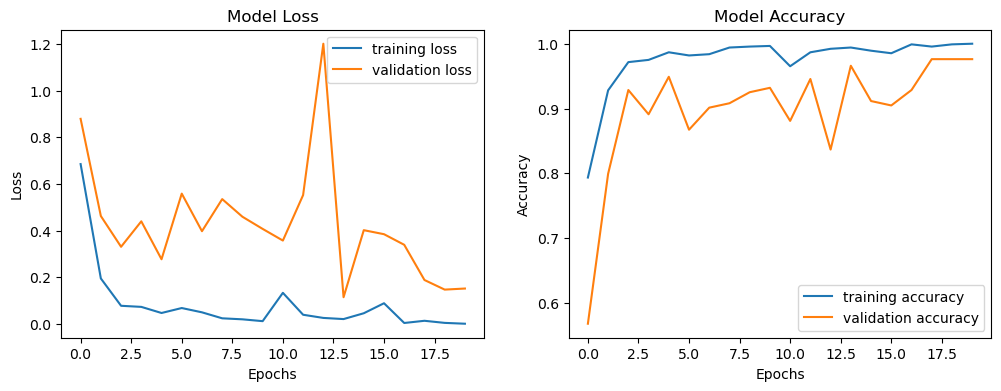

In [10]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

/var/folders/rc/gp38btvd4t10gf8g1hgvk0s40000gn/T/ipykernel_87251/3699243802.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_it, steps = 294)


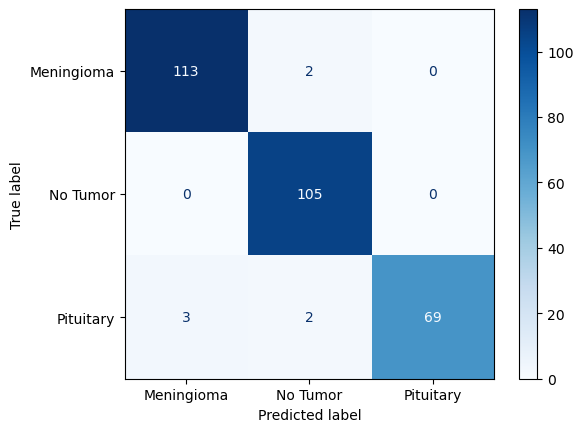

In [11]:
Y_pred = model.predict_generator(test_it, steps = 294)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(test_it.classes, y_pred)
target_names = ['Meningioma', 'No Tumor', 'Pituitary']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()